In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

import cv2
import matplotlib.pyplot as plt
import numpy as np
import scipy.misc
import scipy.ndimage
import skimage.filters
import sklearn.metrics

from PIL import Image

# Turn on interactive mode. Turn off with plt.ioff()
plt.ion()


(1093, 1152, 3)


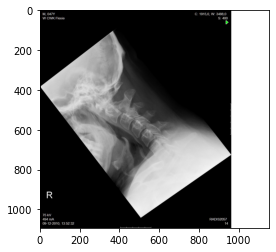

In [26]:
# Import tutorial image
#from skimage import io
#image = cv2.imread('LUMC/Total/4_xray.png')
image = cv2.imread('LUMC/Neck_01flexie_selected/NoSuccess/01_3626090.jpg') 
plt.imshow(image);
print(image.shape)

#img_path='LUMC/Segment/Test/Healthy/491_xray_C3C4.png

(650, 650, 3)


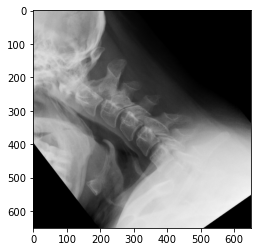

In [27]:
# CROPPING SINGLE IMAGE

import os, sys
import glob

# three image values (height,width, colorlayer) in the form of list
# but we want only height and width -> selecting first two: 
height,width=image.shape[:2]

img = image

# Index crop

#start_row,start_col=int(height*0.2),int(width*0.1)
#end_row,end_col=int(height*0.9),int(width*0.8)

# Numerical crop

start_row,start_col=250,200
end_row,end_col=900,850

cropped=img[start_row:end_row,start_col:end_col]

plt.imshow(cropped)
print(cropped.shape)

#cropped.save('LUMC/Segment/Train/Test_crop')

In [14]:
# FLIP, RESIZE AND CROP IMAGE MAP + SAVE IN INPUT MAP

from PIL import Image
from PIL import ImageOps
import os.path, sys

#path = "LUMC/Saggital_total"
#path = "LUMC/Preprocess_cropped"
path = "LUMC/Neck_01flexie_selected/Test_raw_aug/NoSuccess"
dirs = os.listdir(path)

def rotate():
    for item in dirs:
        fullpath = os.path.join(path,item)         
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            src = cv2.imread(fullpath)
            f, e = os.path.splitext(fullpath)
            imRotate = im.rotate(10) #degrees clockwise
            imRotate.save(f + '_rotated_10.png', "PNG", quality=100) #change degree per session in the name!
rotate()

def resize():
    for item in dirs:
        fullpath = os.path.join(path,item)         
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath)
            imResize = im.resize((1000,1000), Image.ANTIALIAS)
            imResize.save(f + '_resized.png', "PNG", quality=100)
resize()

def crop():
    for item in dirs:
        fullpath = os.path.join(path,item)         
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            f, e = os.path.splitext(fullpath)
            #imResize = im.resize((900,1200), Image.ANTIALIAS)
          #  imCrop = im.crop((50, 350, 700, 1000)) ##(x_min vanaf linkerkant, y_min vanaf bovenkant gekeken, x_max, y_max)
          #  imCrop = im.crop((100, 350, 550, 750)) ##(x_min vanaf linkerkant, y_min vanaf bovenkant gekeken, x_max, y_max)
            imCrop = im.crop((200, 250, 850, 900)) ##(x_min vanaf linkerkant, y_min vanaf bovenkant gekeken, x_max, y_max)
           # imCrop = im.crop((100, 250, 550, 700)) ##(x_min vanaf linkerkant, y_min vanaf bovenkant gekeken, x_max, y_max)
            imCrop.save(f + '_cropped.png', "PNG", quality=100)
#crop()


def flip():
    for item in dirs:
        fullpath = os.path.join(path,item)         
        if os.path.isfile(fullpath):
            im = Image.open(fullpath)
            src = cv2.imread(fullpath)
            f, e = os.path.splitext(fullpath)
            imFlip = ImageOps.mirror(im)
          # imFlip = cv2.flip(src, 1) # 0 is vertical flip (around x-axis) , 1 is horizontal flip (around y-axis)
            imFlip.save(f + '_flipped.png', "PNG", quality=100)
flip()

print('Images are saved in the input folder')

Images are saved in the input folder


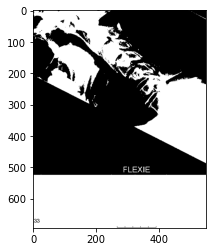

In [59]:
# CONVERT TO RGB AND GRAYSCALE --> BINARY THRESHOLD IMAGE HIGH CONTRAST

# convert to RGB
image = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
# convert to grayscale
gray = cv2.cvtColor(cropped, cv2.COLOR_RGB2GRAY)

# create a binary thresholded image
_, binary = cv2.threshold(gray, 95, 155, cv2.THRESH_BINARY_INV) #150 for this image good, higher is lighter, lower is darker

# show it
plt.imshow(binary, cmap="gray")
plt.show()